In [1]:
import time


class Action:
    def __init__(self, name, release_time) -> None:
        self.state = False
        self.state_start = None
        self.action_time = None
        self.release_time = release_time
        self.name = name

    def state_check(self):
        if self.state == True:
            if (time.time() - self.state_start) > self.action_time:
                print("in false state toggle")
                self.state = False, False
                return False, True
            print("in true toggle")
            return True, False
        else:
            return False, False

    def set(self, action_time):

        if not self.state_start or (self.state_start + self.action_time + self.release_time < time.time()):
            self.action_time = action_time
            self.state_start = time.time()
            self.state=True
            print("in here")
            return True
        else:
            return False



In [18]:
class BehaviourCallback:
    
    def __init__(self):
        pass
    
    def out_condition(self) -> bool:
        raise False
    
    def toggle_condition(self) -> bool:
        return False
    
    def __call__(self, car_state):
        raise NotImplementedError
    
    def set(self):
        raise NotImplementedError


class StopBehvaiour(BehaviourCallback):
    
    def __call__(self,car_state):
        # return 0 speed and 0 steering
        return {"speed":0.0, "steering":0.0}

class PriorityBehaviour(BehaviourCallback):
    def __call__(self,car_state):
        # return pririty speed 
        return {"speed":self.state.priority_speed}

class OvertakeBehaviour(BehaviourCallback):
    
    def __init__(self,**kwargs):
        self.overtakepath=None
        
    def reset(self,car_state):
        # set path here for changing lanes
        pass
    
    def __call__(self,car_state):
        

    
class ActionBehaviour:
    
    def __init__(self,name,release_time=0.0,callback=None):
        self.state = False
        self.state_start = None
        self.action_time = None
        self.release_time = release_time
        self.name = name
        self.callback=callback
        
    def reset(self):
        self.state = False
        self.state_start = None
        self.action_time = None
        self.release_time = release_time
        self.name = name
        
    def __call__(self, car_state=None):
        state,toggle=self.state_check()
        if state:
            if self.callback.out_condition():
                self.state=False
            return self.callback(car_state) 
        elif toggle:
            self.callback.toggle_condition()
        else:
            return None
        
    
    def state_check(self):
        if self.state == True:
            if action_time is not None:
                if (time.time() - self.state_start) > self.action_time:
                    print("in false state toggle")
                    self.state = False
                    return self.state, True
            return self.state, False
        else:
            return self.state, False

    def set(self, action_time=None,**kwargs):
        if not self.state_start or (self.state_start + self.action_time + self.release_time < time.time()):
            self.action_time = action_time
            self.state_start = time.time()
            self.state=True
            self.state.callback.set(**kwargs)
            print("State set")
            return self.state
        else:
            return self.state

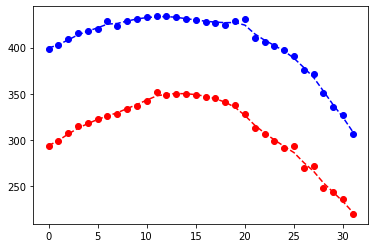

In [20]:
!pip install pykalman

     |████████████████████████████████| 228 kB 1.8 MB/s eta 0:00:01
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48462 sha256=12c577983da02fa6f3cf3abf1df7e07decb1a7038c2532c7a38643c8f378fbdb
  Stored in directory: /home/kaypee/.cache/pip/wheels/7a/68/21/675239322d2bb2e8e1fa317d4bd7b5566a4e82780b25a27f7a
Successfully built pykalman
